# Advanced layer types -- Image Classification

## 0. Import packages and modules

In [1]:
import os
# Limit log messages from Tensorflow
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import pathlib

import sklearn
import tensorflow
import keras

print(sklearn.__version__)
print(tensorflow.__version__)
print(keras.__version__)

1.6.1
2.18.1
3.9.2


In [3]:
# print GPU info

print(tensorflow.config.list_physical_devices('GPU'))

print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


## 1. Formulate / Outline the problem: Image classification

In [4]:
DATA_FOLDER = pathlib.Path('/scratch/project_465001310/env-deep-learning-intro/data/dataset_dollarstreet/') # change to location where you stored the data
train_images = np.load(DATA_FOLDER / 'train_images.npy')
val_images = np.load(DATA_FOLDER / 'test_images.npy')
train_labels = np.load(DATA_FOLDER / 'train_labels.npy')
val_labels = np.load(DATA_FOLDER / 'test_labels.npy')

## 2. Identify inputs and outputs

In [5]:
train_images.shape

(878, 64, 64, 3)

In [6]:
train_images.min(), train_images.max()

(0, 255)

In [7]:
train_labels.shape

(878,)

In [8]:
train_labels.min(), train_labels.max()

(0, 9)

## 3. Prepare data

In [9]:
train_images = train_images / 255.0
val_images = val_images / 255.0

## 4. Build a pretrained model

In [10]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="dollar_street_model_small")

I0000 00:00:1746568451.107138    7845 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 63718 MB memory:  -> device: 0, name: AMD Instinct MI250X, pci bus id: 0000:d9:00.0


In [11]:
model.summary()

Model: "dollar_street_model_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 180000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │     1,800,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,823,960 (6.96 MB)

 Trainable params: 1,823,960 (6.96 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
def create_nn():
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x) # a new maxpooling layer
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x) # a new maxpooling layer (same as maxpool)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x) # a new Dense layer
    outputs = keras.layers.Dense(10)(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="dollar_street_model")
    return model

model = create_nn()
model.summary()

Model: "dollar_street_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │       490,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,510 (1.96 MB)

 Trainable params: 514,510 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Choose a loss function and optimizer

In [13]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

compile_model(model)

## 6. Train the model

In [14]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10


I0000 00:00:1746568481.916348    8941 service.cc:148] XLA service 0x1515740019c0 initialized for platform ROCM (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746568481.916384    8941 service.cc:156]   StreamExecutor device (0): AMD Instinct MI250X, AMDGPU ISA version: gfx90a:sramecc+:xnack-
I0000 00:00:1746568493.282428    8941 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.1065 - loss: 2.3221 - val_accuracy: 0.1638 - val_loss: 2.2961
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1741 - loss: 2.2870 - val_accuracy: 0.1672 - val_loss: 2.3089
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2275 - loss: 2.2088 - val_accuracy: 0.1741 - val_loss: 2.2767
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2493 - loss: 2.0744 - val_accuracy: 0.2321 - val_loss: 2.1295
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4008 - loss: 1.7993 - val_accuracy: 0.2457 - val_loss: 2.1749
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4661 - loss: 1.6003 - val_accuracy: 0.2457 - val_loss: 2.3011
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5396 - loss: 1.3444 - val_accuracy: 0.2799 - val_loss: 2.2644
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6331 - loss: 1.1510 - val_accuracy: 0.3003 - val_loss: 2.3541


## 7. Perform a Prediction/Classification

## 8. Measure performance

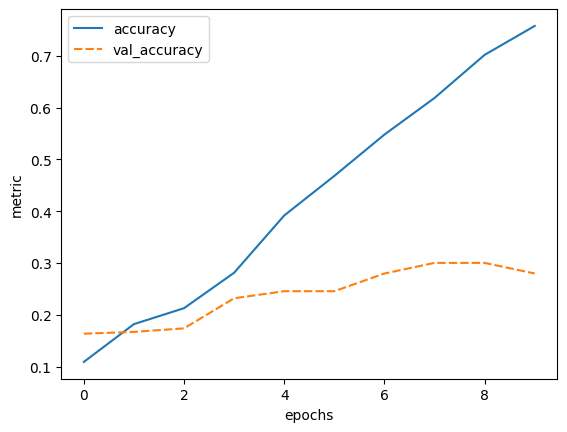

In [15]:
def plot_history(history, metrics):
    """
    Plot the training history

    Args:
        history (keras History object that is returned by model.fit())
        metrics(str, list): Metric or a list of metrics to plot
    """
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metric")

plot_history(history, ['accuracy', 'val_accuracy'])

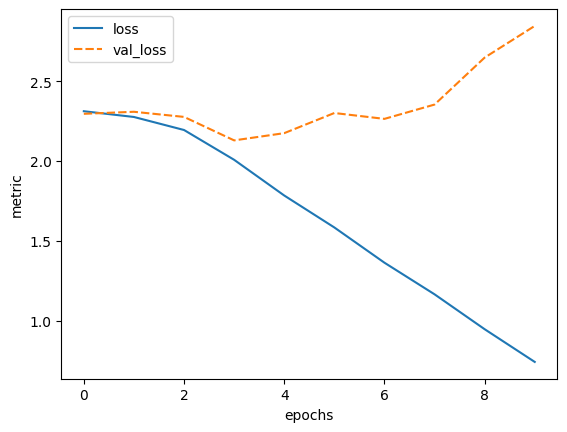

In [17]:
plot_history(history, ['loss', 'val_loss'])

**Comparison with a network with only dense layers**

In [18]:
def create_dense_model():
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(50, activation='relu')(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    return keras.models.Model(inputs=inputs, outputs=outputs,
                              name='dense_model')

dense_model = create_dense_model()
dense_model.summary()

Model: "dense_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │       614,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617,510 (2.36 MB)

 Trainable params: 617,510 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.0818 - loss: 2.8770 - val_accuracy: 0.1229 - val_loss: 2.2993
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1055 - loss: 2.3059 - val_accuracy: 0.0990 - val_loss: 2.3008
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0969 - loss: 2.3009 - val_accuracy: 0.1195 - val_loss: 2.3001
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1172 - loss: 2.3005 - val_accuracy: 0.1297 - val_loss: 2.2994
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1307 - loss: 2.2995 - val_accuracy: 0.1263 - val_loss: 2.2989
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1402 - loss: 2.2980 - val_accuracy: 0.1263 - val_loss: 2.2982
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1257 - loss: 2.2970 - val_accuracy: 0.1263 - val_loss: 2.2977
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1391 - loss: 2.2945 - val_accuracy: 0.1263 - val_los

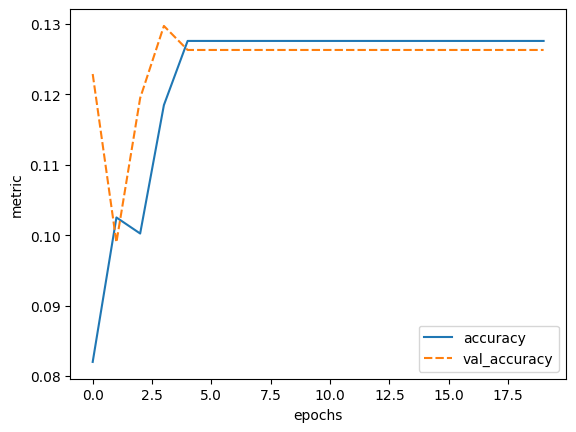

In [19]:
compile_model(dense_model)
history = dense_model.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels))
plot_history(history, ['accuracy', 'val_accuracy'])

## 9. Refine the model

In [20]:
def create_nn_with_dropout():
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.8)(x) # This is new!

    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.8)(x) # This is new!

    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.8)(x) # This is new!

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="dropout_model")
    return model

model_dropout = create_nn_with_dropout()
model_dropout.summary()

Model: "dropout_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │        90,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,060 (535.39 KB)

 Trainable params: 137,060 (535.39 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
compile_model(model_dropout)

history = model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels))

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.0935 - loss: 2.8134 - val_accuracy: 0.1024 - val_loss: 2.3024
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0994 - loss: 2.3203 - val_accuracy: 0.1263 - val_loss: 2.3019
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1201 - loss: 2.3011 - val_accuracy: 0.1263 - val_loss: 2.3013
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1268 - loss: 2.2952 - val_accuracy: 0.1263 - val_loss: 2.3008
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1501 - loss: 2.2928 - val_accuracy: 0.1263 - val_loss: 2.3000
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1340 - loss: 2.2906 - val_accuracy: 0.1263 - val_loss: 2.2998
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1305 - loss: 2.2869 - val_accuracy: 0.1263 - val_loss: 2.2979
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1403 - loss: 2.2835 - val_accuracy: 0.1263 - val_los

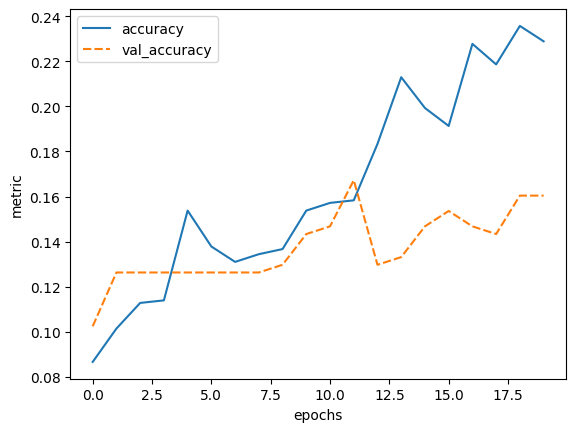

In [22]:
plot_history(history, ['accuracy', 'val_accuracy'])

In [23]:
def create_nn_with_hp(dropout_rate, n_layers):
    inputs = keras.Input(shape=train_images.shape[1:])
    x = inputs
    for layer in range(n_layers):
        x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
        x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
    return model

**NOTE**: here we need to install keras_tuner. In LUMI, it comes preinstalled. Otherwise run the following inside a Jupyter cell: 

```
!python3 -m pip install keras_tuner
```

In [24]:
import keras_tuner

hp = keras_tuner.HyperParameters()

def build_model(hp):
    # Define values for hyperparameters to try out:
    n_layers = hp.Int("n_layers", min_value=1, max_value=2, step=1)
    dropout_rate = hp.Float("dropout_rate", min_value=0.2, max_value=0.8, step=0.3)

    model = create_nn_with_hp(dropout_rate, n_layers)
    compile_model(model)
    return model

tuner = keras_tuner.GridSearch(build_model, objective='val_loss')

tuner.search(train_images, train_labels, epochs=20,
             validation_data=(val_images, val_labels))

Trial 6 Complete [00h 00m 07s]
val_loss: 2.1643190383911133

Best val_loss So Far: 2.089916944503784
Total elapsed time: 00h 00m 46s


In [25]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0004 summary
Hyperparameters:
n_layers: 2
dropout_rate: 0.5
Score: 2.089916944503784

Trial 0003 summary
Hyperparameters:
n_layers: 2
dropout_rate: 0.2
Score: 2.105560302734375

Trial 0002 summary
Hyperparameters:
n_layers: 1
dropout_rate: 0.8
Score: 2.1178030967712402

Trial 0001 summary
Hyperparameters:
n_layers: 1
dropout_rate: 0.5
Score: 2.1375913619995117

Trial 0005 summary
Hyperparameters:
n_layers: 2
dropout_rate: 0.8
Score: 2.1643190383911133

Trial 0000 summary
Hyperparameters:
n_layers: 1
dropout_rate: 0.2
Score: 2.2084598541259766


## 10. Share model

In [26]:
model.save('image_classification.keras')